In [1]:
# clear warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from sklearn.cluster import KMeans

from collections import Counter


#pd.set_option("display.max_rows", None)

In [2]:
student = pd.read_csv("miho_data.csv")

In [24]:
student.shape

(5820, 37)

In [3]:
df_q = student.iloc[:,5:-4]



kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_q)
labels = kmeans.labels_

In [4]:
student["clusters"] = labels

In [5]:
student
# data with no duplicates
df = student.drop_duplicates()

So basically we have 3 clusters, from the previous notebook they really separated linearly, so I think it might be ok to rename them "negative", "natural" and "positive"   

In [6]:
Counter(student["clusters"])

Counter({2: 2369, 1: 2209, 0: 1242})

In [7]:
student.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q23,Q24,Q25,Q26,Q27,Q28,nb.repeat_binary,Q11_binary,nb.repeat_Q11_binary,clusters
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,1,0,0,2
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,1,0,0,2
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,1,1,1,1
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,1,0,0,2
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


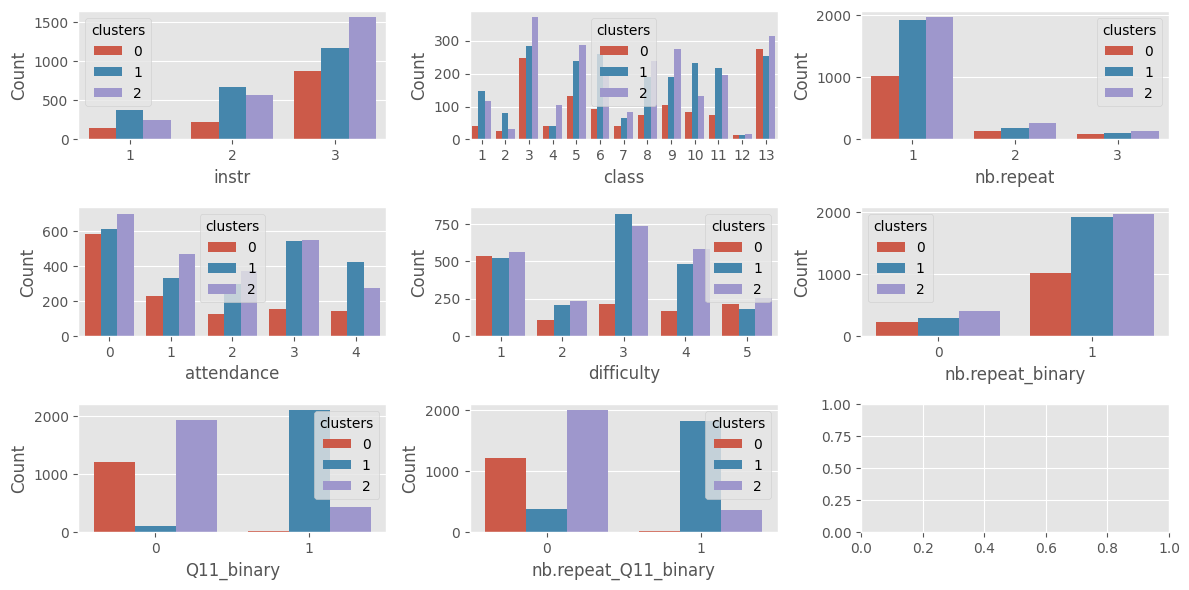

In [8]:
# Visualizations
cat_cols = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', "nb.repeat_binary", "Q11_binary", 
            "nb.repeat_Q11_binary"]
fig, axs = plt.subplots(len(cat_cols)//3+1, 3, figsize=(12, 6))
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(x = student[col], hue = student["clusters"], ax = axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

# i didn't like the total graphs. To investigate I will create each individually.

In [9]:
def plot_with_numbers(data : student, data2 : df, column: str):
    ggplot_palette = sns.color_palette("Set1") 

    sns.set_palette(ggplot_palette)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot with duplicates
    ax1 = sns.countplot(data=student, x=column, hue="clusters", ax=axes[0])

    # Annotate the bars with value counts for duplicates
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    # Plot without duplicates
    ax2 = sns.countplot(data=df, x=column, hue="clusters", ax=axes[1])

    # Annotate the bars with value counts for non-duplicates
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    # Add labels to the legend
    cluster_labels = ["Positive", "Neutral", "Negative"]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=ggplot_palette[i], markersize=10, label=label) for
               i, label in enumerate(cluster_labels)]

    # Create the legend for both subplots
    axes[0].legend(handles=handles, title="Clusters", loc="best")
    axes[1].legend(handles=handles, title="Clusters", loc="best")

    # Set titles for subplots
    axes[0].set_title("With Duplicates")
    axes[1].set_title("Without Duplicates")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


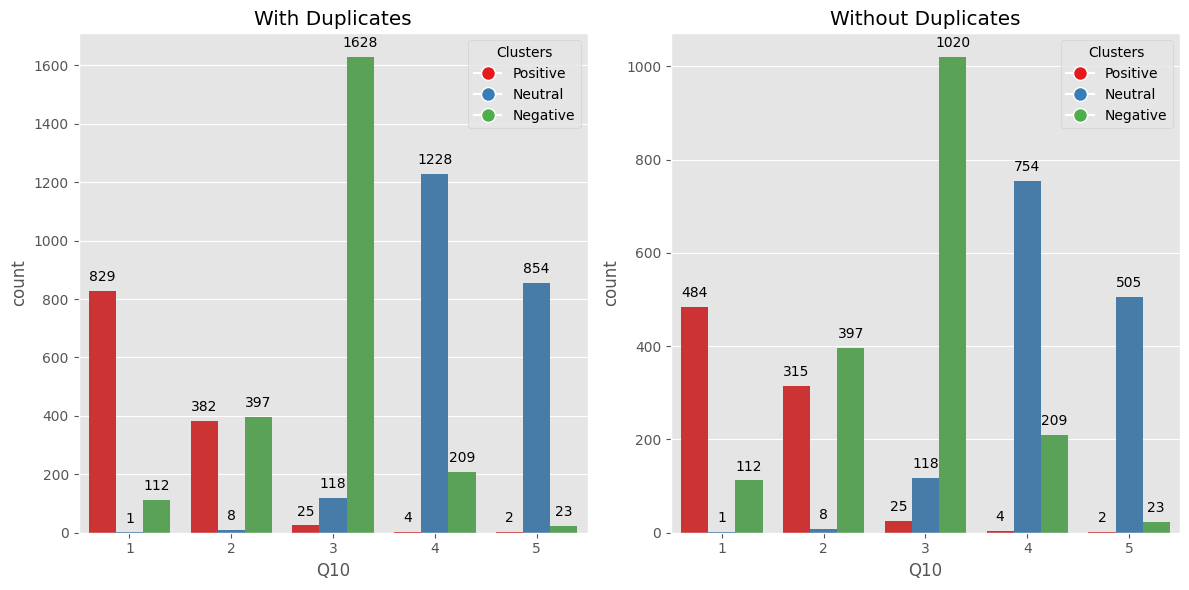

In [10]:
plot_with_numbers(student, df,  "Q10")

According to the discussion at the slack channel, I first investigated the Q10; so i think naming clusters as appropirate:  
Cluster 0: Positive   
Cluster 1: Neutral   
Cluster 2: Negative   

Removing duplicates didn't change the distribution of the items. Still, most of the answers gathered around 3 and 4. 

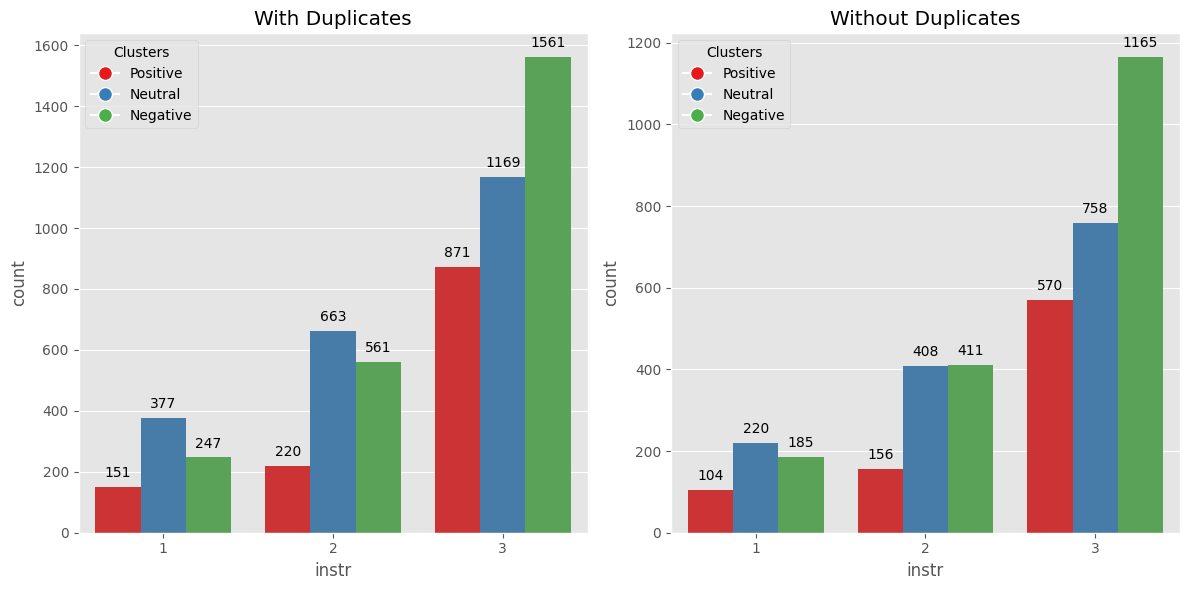

In [11]:
# instr
plot_with_numbers(student, df, "instr")

Instructor 2 and 1 have more positive feedbacks; 3 has more neutral feedbacks but all the instructors have low negative feedbacks.

<Figure size 2000x1000 with 0 Axes>

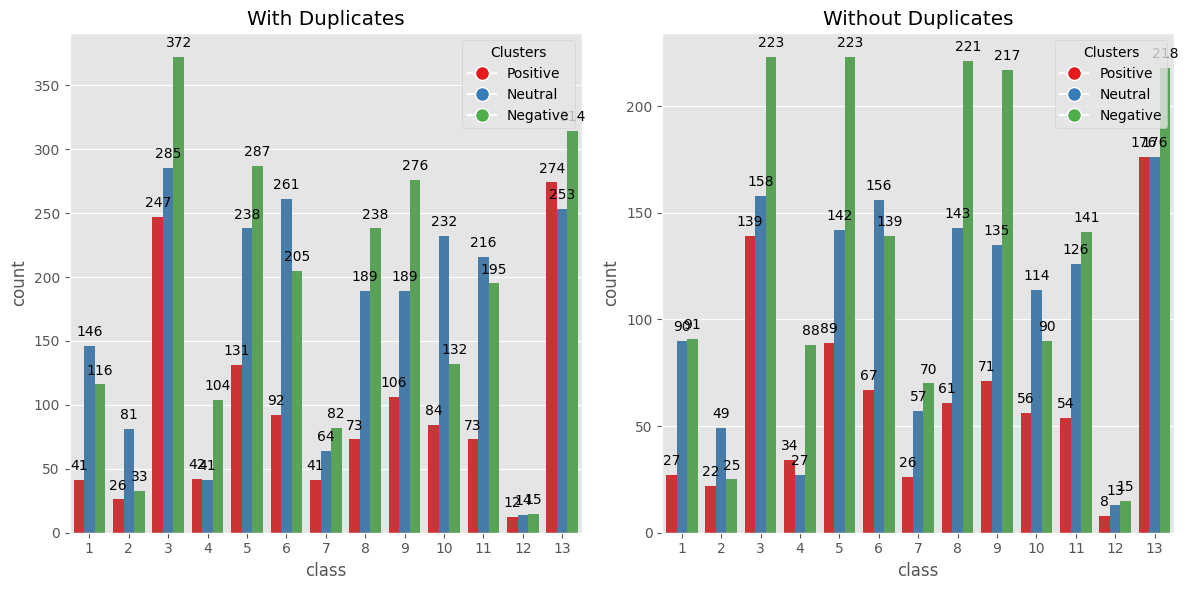

In [12]:
# class
plt.figure(figsize = (20,10))
plot_with_numbers(student, df, "class")
plt.show()

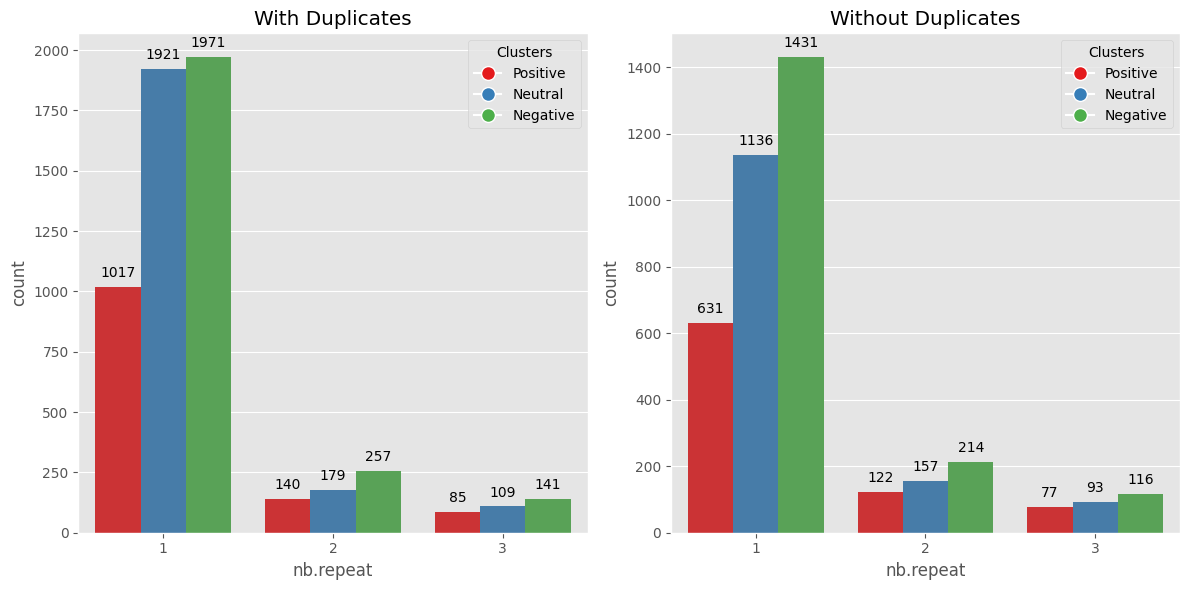

In [13]:
plot_with_numbers(student, df , "nb.repeat")

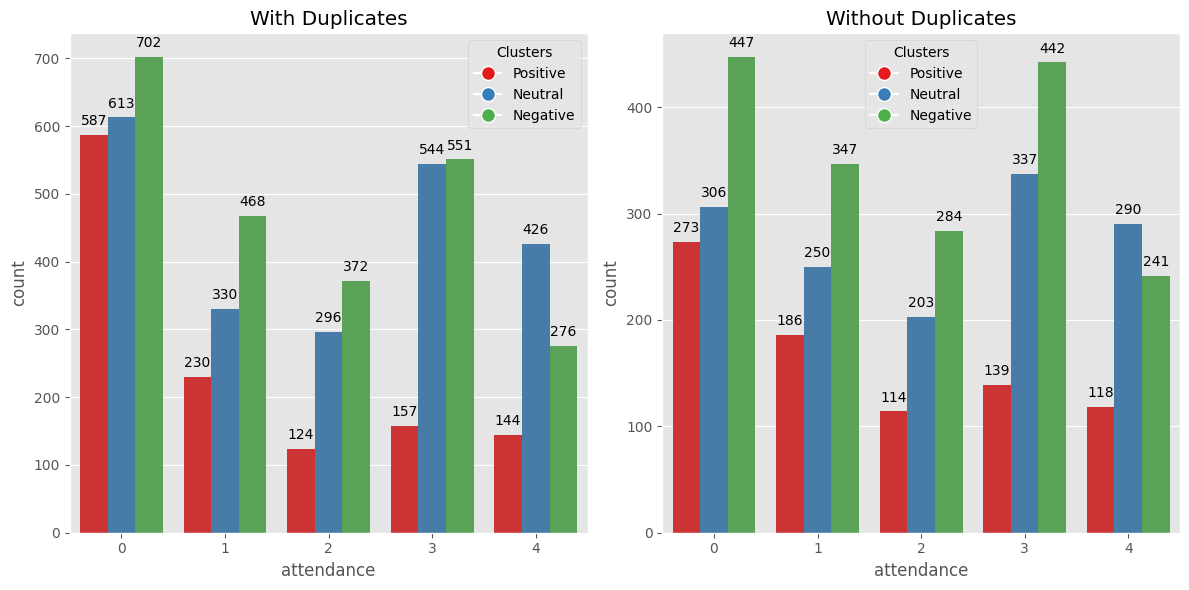

In [14]:
plot_with_numbers(student, df, "attendance")

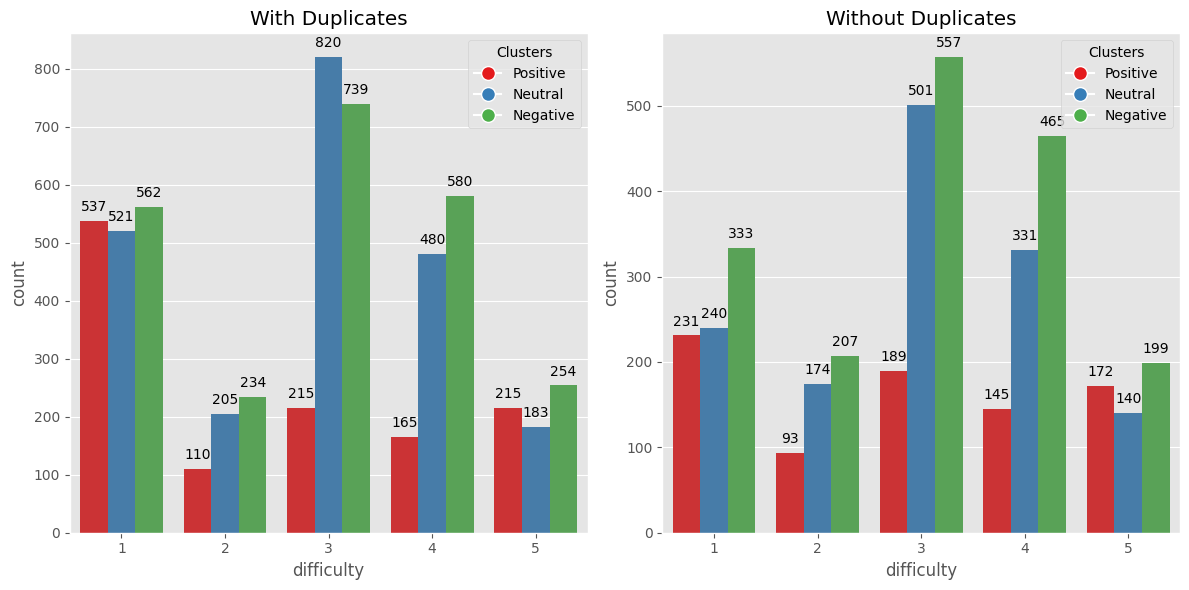

In [15]:
plot_with_numbers(student, df, "difficulty")

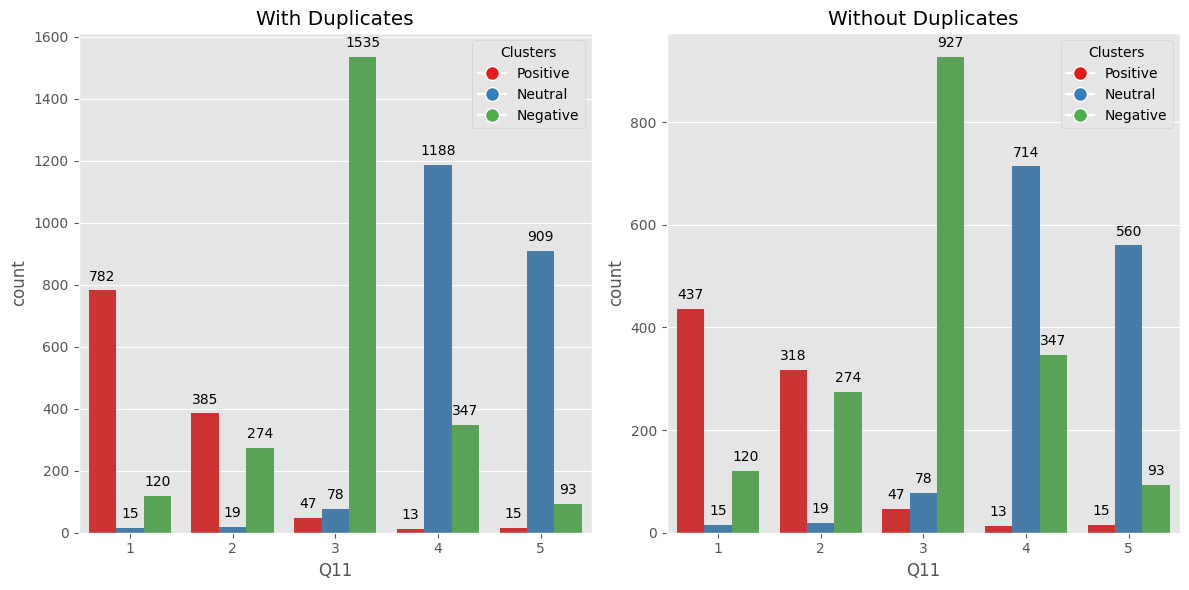

In [16]:
plot_with_numbers(student, df, "Q11")

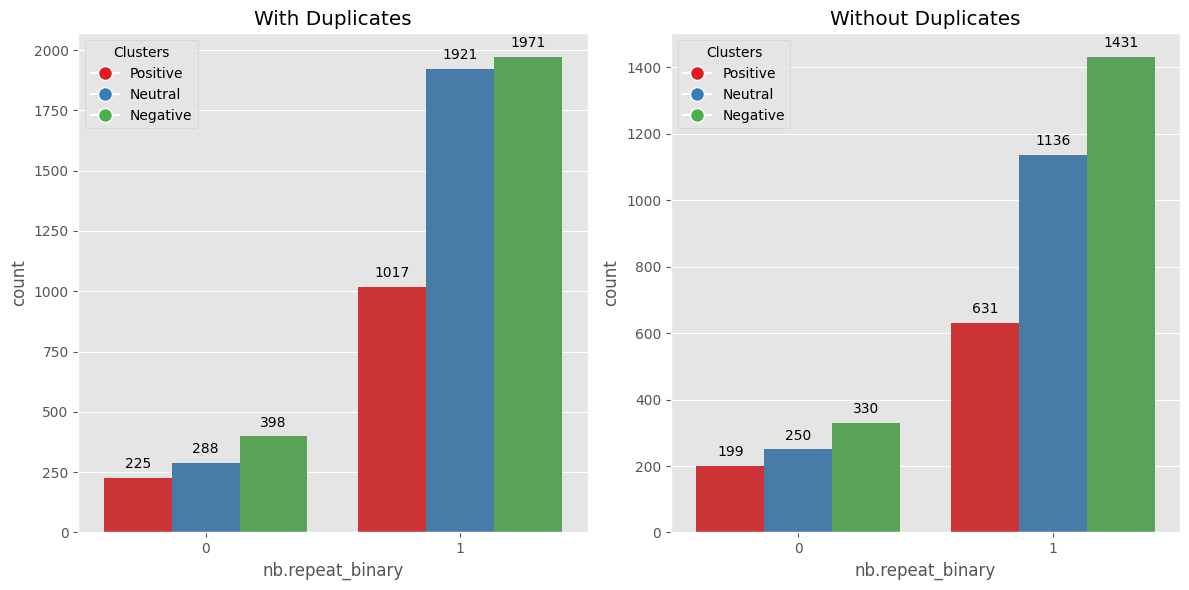

In [17]:
plot_with_numbers(student, df, "nb.repeat_binary")

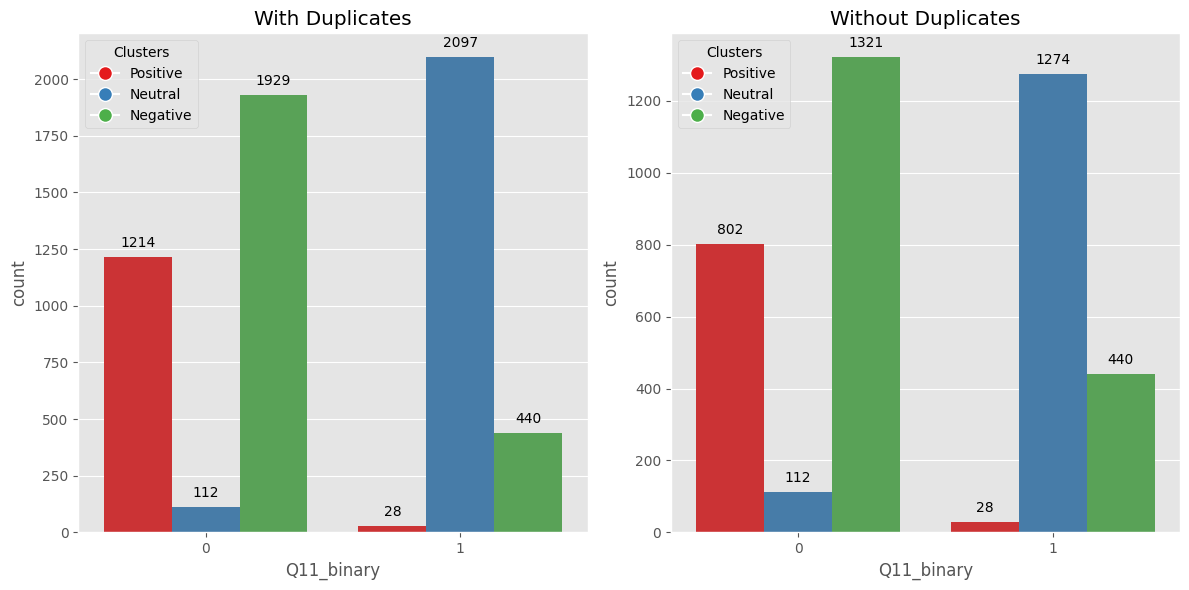

In [18]:
plot_with_numbers(student, df, "Q11_binary")

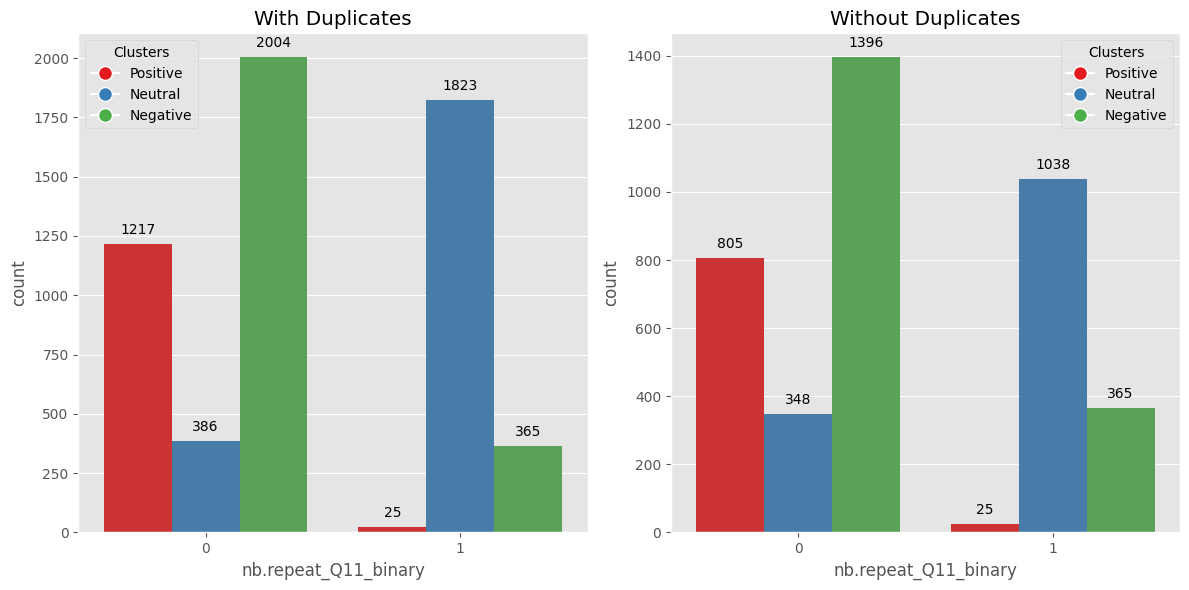

In [21]:
plot_with_numbers(student, df, "nb.repeat_Q11_binary")

# Heatmaps 

Text(0.5, 1.0, 'Heatmap with All the Data')

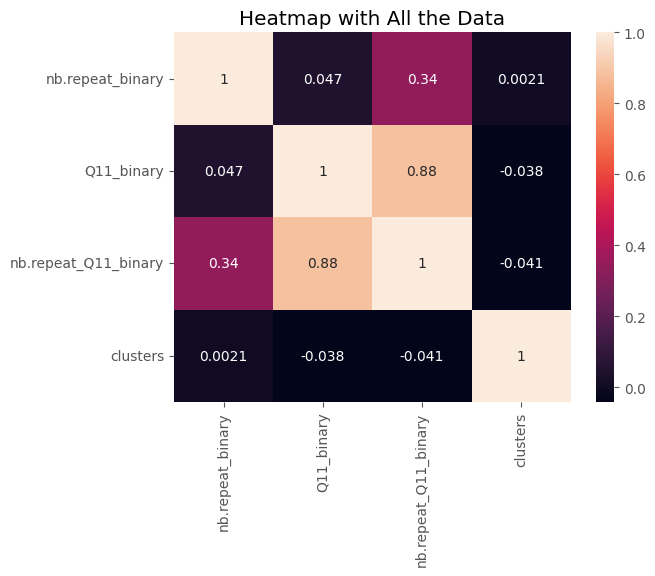

In [34]:
corr = student.iloc[:,33::].corr()

sns.heatmap(corr, annot = True)
plt.title("Heatmap with All the Data")

Text(0.5, 1.0, 'Heatmap without Duplicates')

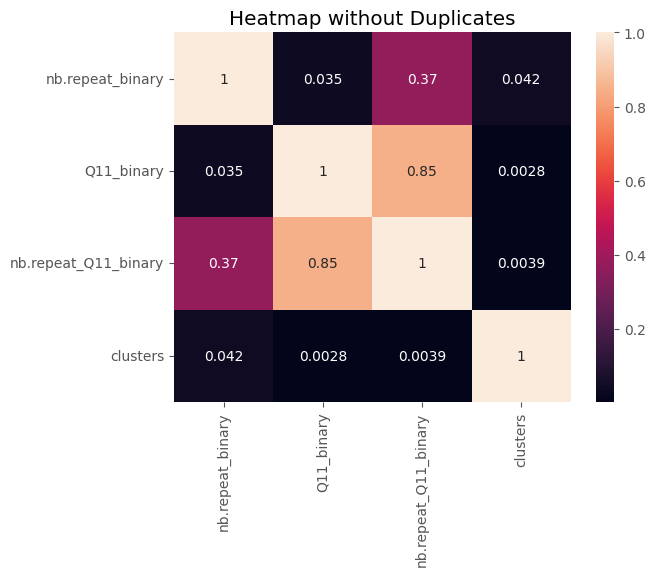

In [33]:
corr = df.iloc[:,33::].corr()

sns.heatmap(corr, annot = True)
plt.title("Heatmap without Duplicates")